Today we'll demo a few commonly used Python packages that you may encounter, including: 


*   Matplotlib: library for all your plotting needs
*   SciPy: library of tools for scientific & mathematical applications
*   Astropy: astronomical applications
*   SymPy: symbolic mathematics
*   pandas: data manipulation/analysis

These packages are included in the Anaconda installation. If you don't have Anaconda, you can download each of these packages manually using pip.

We will only scratch the surface by introducing a few functions from each library that you may need, but there is a LOT more that we won't cover. Whenever you're trying to solve a specific problem, it's worth Googling the issue and seeing if one of these packages has a built-in function for it! That being said, when you encounter a new function, try not to treat it like a black box -- read its documentation carefully and make sure it is appropriate for your application. 





# Matplotlib


Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$. Here we will take a first look at creating a simple plot of this type. As with all the following sections, we'll start by setting up the notebook for plotting and importing the packages we will use:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

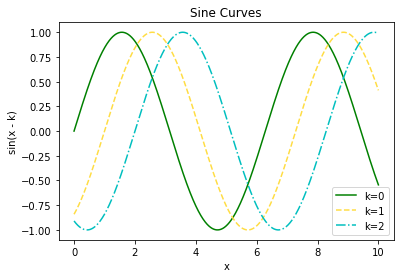

In [ ]:
x = np.linspace(0, 10, 1000)    # abscissa values

# Plot a few sinusoids with different colors, linestyles and labels

fig = plt.figure()    # intialize a figure object

plt.plot(x, np.sin(x - 0), color='g', linestyle='-', label='k=0')    # solid green line
plt.plot(x, np.sin(x - 1), color='#FFDD44', linestyle='--', label='k=1')  # dashed line with color specified in Hex code
plt.plot(x, np.sin(x - 2), '-.c', label='k=2')    # dashdot cyan line specified with one code  

# Add title and axes labels

plt.title("Sine Curves")
plt.xlabel("x")
plt.ylabel("sin(x - k)")

# Create a legend

plt.legend()

Try plotting a simple line ($y = mx+b$) and testing out a few different plotting styles:


*   make it a scatter plot
*   change the fontsize of the axes labels (hint: look at the documentation for the plt.xlabel() and plt.ylabel() commands).
*   modify the figure size (hint: look at the documentation for the plt.figure() command)
*   change the limits of the x- and y-axes (hint: look up plt.xlim())










We can save our figure in a specified format (e.g., a PDF) to a specific directory as follows:

In [ ]:
plt.savefig('testfigure.pdf') # modify with a path and filename of your choosing 

<Figure size 432x288 with 0 Axes>

### Multiple plots

To plot panels, Matplotlib introduces a distinction between "Figures" (the full image) and "Axes" (individual panels). We include an example here for completeness and your reference.

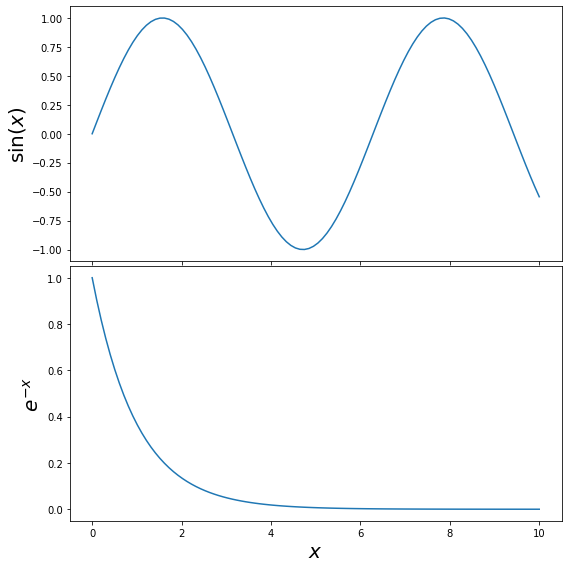

In [ ]:
# two plots vertically placed, total figure size 8x8 (arbitrary units), shared x axis
fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.exp(-x)
ax[0].plot(x, y1)
ax[1].plot(x, y2)
# label the axes separately
ax[1].set_xlabel(r'$x$', fontsize=20)
ax[1].set_ylabel(r'$e^{-x}$', fontsize=20)
ax[0].set_ylabel(r'$\sin(x)$', fontsize=20)
plt.tight_layout() # useful if you see axis labels getting cut off
fig.subplots_adjust(hspace=0.02)

# SciPy

SciPy has a huge range of powerful functions for a wide range of applications. Today we'll only test out a few of these functions.

**Curve Fitting**

Suppose you need to fit a model to some data using nonlinear least squares fitting. The curve_fit() function is a great place to start!

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
# define our model
def func(x, a, b, c):
  return a * np.exp(-b * x) + c

In [ ]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
popt, pcov = curve_fit(func, xdata, ydata)

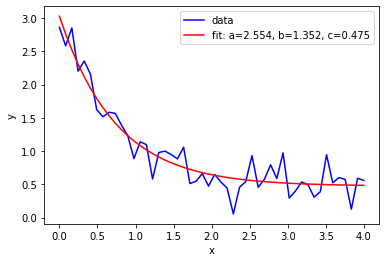

In [ ]:
plt.plot(xdata, ydata, 'b-', label='data')
# plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a={:5.3f}, b={:5.3f}, c={:5.3f}'.format(*popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Check what happens when you restrict the bounds of the model parameters in the example above.

**Interpolation**

Suppose you have a sparsely sampled data set, and you want to estimate how the data behaves with higher resolution. We can do this using interpolation. Here we'll demo a simple 1D example.

In [ ]:
from scipy.interpolate import interp1d

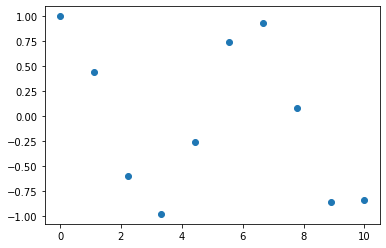

In [ ]:
# define a sparsely sampled data set
x = np.linspace(0,10,10)
y = np.cos(x)
plt.plot(x,y,'o')

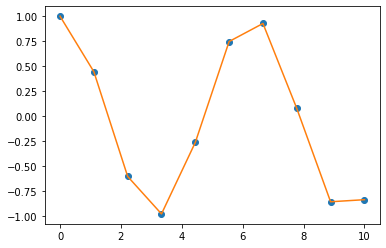

In [ ]:
# interpolate over the data set to estimate how it behaves in the gaps
f = interp1d(x,y)
xnew = np.linspace(0,10,100)
ynew = f(xnew)
plt.plot(x,y,'o',label='data')
plt.plot(xnew,ynew,'-',label='interpolated')

The interpolation doesn't look too good. Check what kind of interpolation interp1d() defaults to (documentation!). What happens when you change the kind of interpolation to 'cubic'?

**ODE Solving**

Let's try solving the very simple ordinary differential equation $\frac{dy}{dt} = -y$

In [ ]:
def dydt(t, y):
  return -y

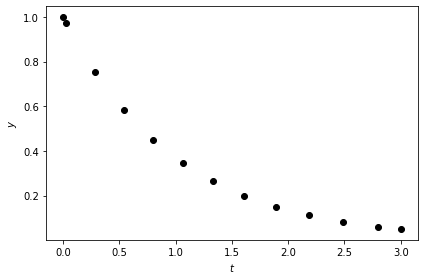

In [ ]:
from scipy.integrate import solve_ivp
ret = solve_ivp(dydt, (0, 3), np.array([1]),
                method='DOP853', atol=1e-11, rtol=1e-11) # extra integration options
plt.plot(ret.t, ret.y[0], 'ko')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.tight_layout()

# Astropy

Astropy is great for a lot of different applications in astronomy. Today we'll demo just a few capabilities that you might encounter: reading fits images, working with different coordinate systems, and manipulating time.

**Reading a fits file**

In [ ]:
from astropy.io import fits

In [ ]:
# retrieve some sample data from astropy
from astropy.utils.data import get_pkg_data_filename
image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

In [ ]:
# look at the structure of the file
fits.info(image_file)

Filename: /root/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [ ]:
# read the structured data array, which is contained in the primary hdu.
image_data = fits.getdata(image_file, ext=0)

In [ ]:
# the data is a 2D numpy array -- print out its shape

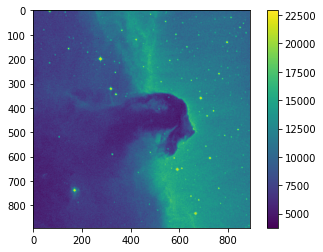

In [ ]:
# plot the image
plt.figure()
plt.imshow(image_data)
plt.colorbar()

We can manipulate the image just like any 2D numpy array. Try plotting a segment of the image that only contains the head of the nebula (review: indexing numpy array). Also, take a moment to look up matplotlib colormaps, and try out a couple different colormaps to see which is your favorite.

**Working with coordinates**

Astropy has a lot of different functions for converting between coordinate systems, plotting images with proper coordinate axes, and calculating the separation and offset between different positions on the sky. We'll demo an example of converting an object's position from right ascension and declination (RA & Dec) to Galactic longitude and latitude.

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [ ]:
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>


In [ ]:
print(c.ra,c.dec)

10d37m30s 41d12m00s


In [ ]:
print(c.dec.radian) # converting from degrees to radians!

0.7190756518216638


In [ ]:
c_gal = c.galactic
print(c_gal)

<SkyCoord (Galactic): (l, b) in deg
    (121.12334339, -21.6403587)>


In [ ]:
# calculate angular separation between two coordinates
c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, frame='fk5')
c1.separation(c2)  # Differing frames handled correctly  

<Angle 1.40453359 deg>

**Manipulating Time**

Depending on the data you work with, you may need to work with different astronomical conventions for measuring time. Astropy handles this sort of functionality with the Time object.

In [ ]:
from astropy.time import Time

In [ ]:
# defining a Time object from a list of times
times = ['1999-01-01T00:00:00.123456789', '2010-01-01T00:00:00']
t = Time(times, format='isot', scale='utc')

In [ ]:
# convert the times from ISO format to Modified Julian Day number (MJD)
print(t.mjd)

[51179.00000143 55197.        ]


In [ ]:
# calculate the amount of time between the two entries in the list
dt = t[1]-t[0]
print(dt)
print(dt.format)

4018.00002171925
jd


In [ ]:
print(dt.sec)

347155201.8765432


# Sympy

Sympy allows symbolic computation of simple equations, similar to Wolfram Mathematica. 

In [3]:
import sympy as sp
sp.init_printing(use_latex=True)

In [13]:
x = sp.symbols('x', positive=True)
x**2 # Jupyter will by default print the final value, which will be done in LaTeX thanks to use_latex=True

In [ ]:
from IPython.display import display
display(x**2)
print("See we can manually display too")

See we can manually display too


In [ ]:
display(sp.expand((x + 1) * (x + 2)))
display(sp.factor(x**2 + 3 * x + 2))
display(sp.simplify(3 * x + 2 * x))

In [ ]:
y = x**3 + x**2 + 3 * x
expr = sp.diff(y, x)
display(expr)

### Caveats

- To use fractions, use `Rational`s to avoid truncation error and un-pretty numbers
- To do operations on trig functions, use the sympy-provided versions.

In [10]:
print('floats', sp.simplify(3/4 * 4/3))
print('Rationals', sp.simplify(sp.Rational(3, 4) * sp.Rational(4, 3)))

floats 1.00000000000000
Rationals 1


In [15]:
y = sp.sin(x)
expr = sp.diff(y, x)
display(expr)

We can also output the expression in LaTeX syntax.

In [ ]:
display(sp.latex(expr))

# pandas

pandas is a library for data analysis and manipulation. It provides data structures and operations for efficiently working with numerical tables and time series. 

In [ ]:
import pandas as pd 

np.random.seed(0)
values = np.random.randn(100) # array of normally distributed random numbers
s = pd.Series(values) # generate a pandas series
s.plot(kind='hist', title='Normally distributed random values') #plot a histogram using pandas plot() function
plt.show()

In [ ]:
#calculate descriptive statistics
s.describe()

In [ ]:
#generate a pandas dataframe
df = pd.DataFrame({'A': [1, 2, 1, 4, 3, 5, 2, 3, 4, 1],
                   'B': [12, 14, 11, 16, 18, 18, 22, 13, 21, 17],
                   'C': ['a', 'a', 'b', 'a', 'b', 'c', 'b', 'a', 'b', 'a']})

df

In [ ]:
#descriptive statistics for a dataframe will yield a dataframe of statistics. Note: for numerical columns only
df.describe()

In [ ]:
#select a desired subset of data
colC = df['C'] #get column C from the dataframe (this is a pandas Series object)
mask = colC == 'a' #create a boolean mask

#apply the mask to the dataframe
df[mask]

In [ ]:
#data can easily be exchanged between the astropy Table class and pandas dataframes
from astropy.table import Table

t = Table()
t['a'] = [1, 2, 3, 4]
t['b'] = ['a', 'b', 'c', 'd']
t

In [ ]:
df = t.to_pandas()
df

In [ ]:
t2 = Table.from_pandas(df)
t2

# Some random tips and tricks

:)

In [ ]:
#make your jupyter notebook cells fill the width of your screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Getting rid of annoying printed lines that sometimes appear before a figure is plotted 

In [ ]:
#However, here is one situation where I like to use a semicolon
x1,x2 = np.mgrid[0:2*np.pi:20j,0:20:20j]
y = np.sin(x1) + x2

#plotting a 2D array like this will probably print many annoying lines of useless info ahead of our plot
plt.plot(y)

In [ ]:
#add a semicolon (or any other code after the plot statement) for a clean figure
plt.plot(y);

In [ ]:
a=1; b=2; c=3 #this code will work, but it is generally frowned upon as it can make the code harder to read and to identify sources of error

d=4; #this will also run, the semicolon just doesn't serve any purpose

a,b,c,d